In [1]:
import pickle
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,GridSearchCV,GroupKFold,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error




In [2]:
DATA_PATH=r'..\data\raw\train.csv'
TEST_PATH=r'..\data\raw\test.csv'
TRAIN_DATA=r'..\data\processed\dataframe.pkl'

In [3]:
train_df=pd.read_pickle(TRAIN_DATA)

In [4]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,...,yearly_price_per_km_x,monthly_price_per_km_x,yearly_price_per_km_y,monthly_price_per_km_y,dayofweek_price_per_km,hourly_price_per_km,yearly_fare,monthly_fare,weekly_fare,hourly_fare
0,13.0,2015-04-28 14:53:14 UTC,-73.963570,40.771313,-73.978333,40.751076,1,2015,4,28,...,4.26,3.76,4.26,3.76,3.76,4.08,13.05,11.32,11.38,11.90
1,24.5,2013-03-16 22:10:15 UTC,-73.985932,40.778404,-73.996953,40.722665,2,2013,3,16,...,4.08,3.76,4.08,3.76,3.75,3.45,12.63,11.19,11.36,11.29
2,6.9,2010-07-30 23:12:10 UTC,-74.008468,40.720306,-73.991503,40.736797,1,2010,7,30,...,3.45,3.63,3.45,3.63,3.76,3.39,10.03,11.09,11.33,11.58
3,8.5,2012-11-27 20:57:00 UTC,-73.970175,40.753165,-73.993177,40.746402,6,2012,11,27,...,3.65,3.82,3.65,3.82,3.76,3.63,11.20,11.55,11.43,10.75
4,16.0,2012-11-09 16:40:44 UTC,-73.959817,40.782076,-73.977885,40.736664,1,2012,11,9,...,3.65,3.82,3.65,3.82,3.77,3.91,11.20,11.55,11.24,11.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759545,26.0,2014-02-13 09:14:18 UTC,-73.971071,40.793042,-73.993785,40.735692,1,2014,2,13,...,4.17,3.79,4.17,3.79,3.77,4.10,12.91,10.87,11.34,10.90
4759546,16.0,2015-02-17 12:51:14 UTC,-73.988289,40.758099,-73.948479,40.774315,1,2015,2,17,...,4.26,3.79,4.26,3.79,3.75,4.13,13.05,10.87,11.38,11.15
4759547,4.5,2011-05-07 00:54:00 UTC,-73.984467,40.742635,-73.992980,40.736825,5,2011,5,7,...,3.48,3.75,3.48,3.75,3.78,3.33,10.42,11.59,11.29,11.61
4759548,14.0,2012-09-10 16:18:00 UTC,-73.954360,40.765430,-73.991362,40.754072,6,2012,9,10,...,3.65,3.79,3.65,3.79,3.77,3.91,11.20,11.62,11.28,11.89


In [5]:
train_df.drop(columns=['pickup_datetime','monthly_price_per_km_y','yearly_price_per_km_y'],axis=1,inplace=True)

In [6]:
correlation_matrix = train_df.corr(method='pearson')


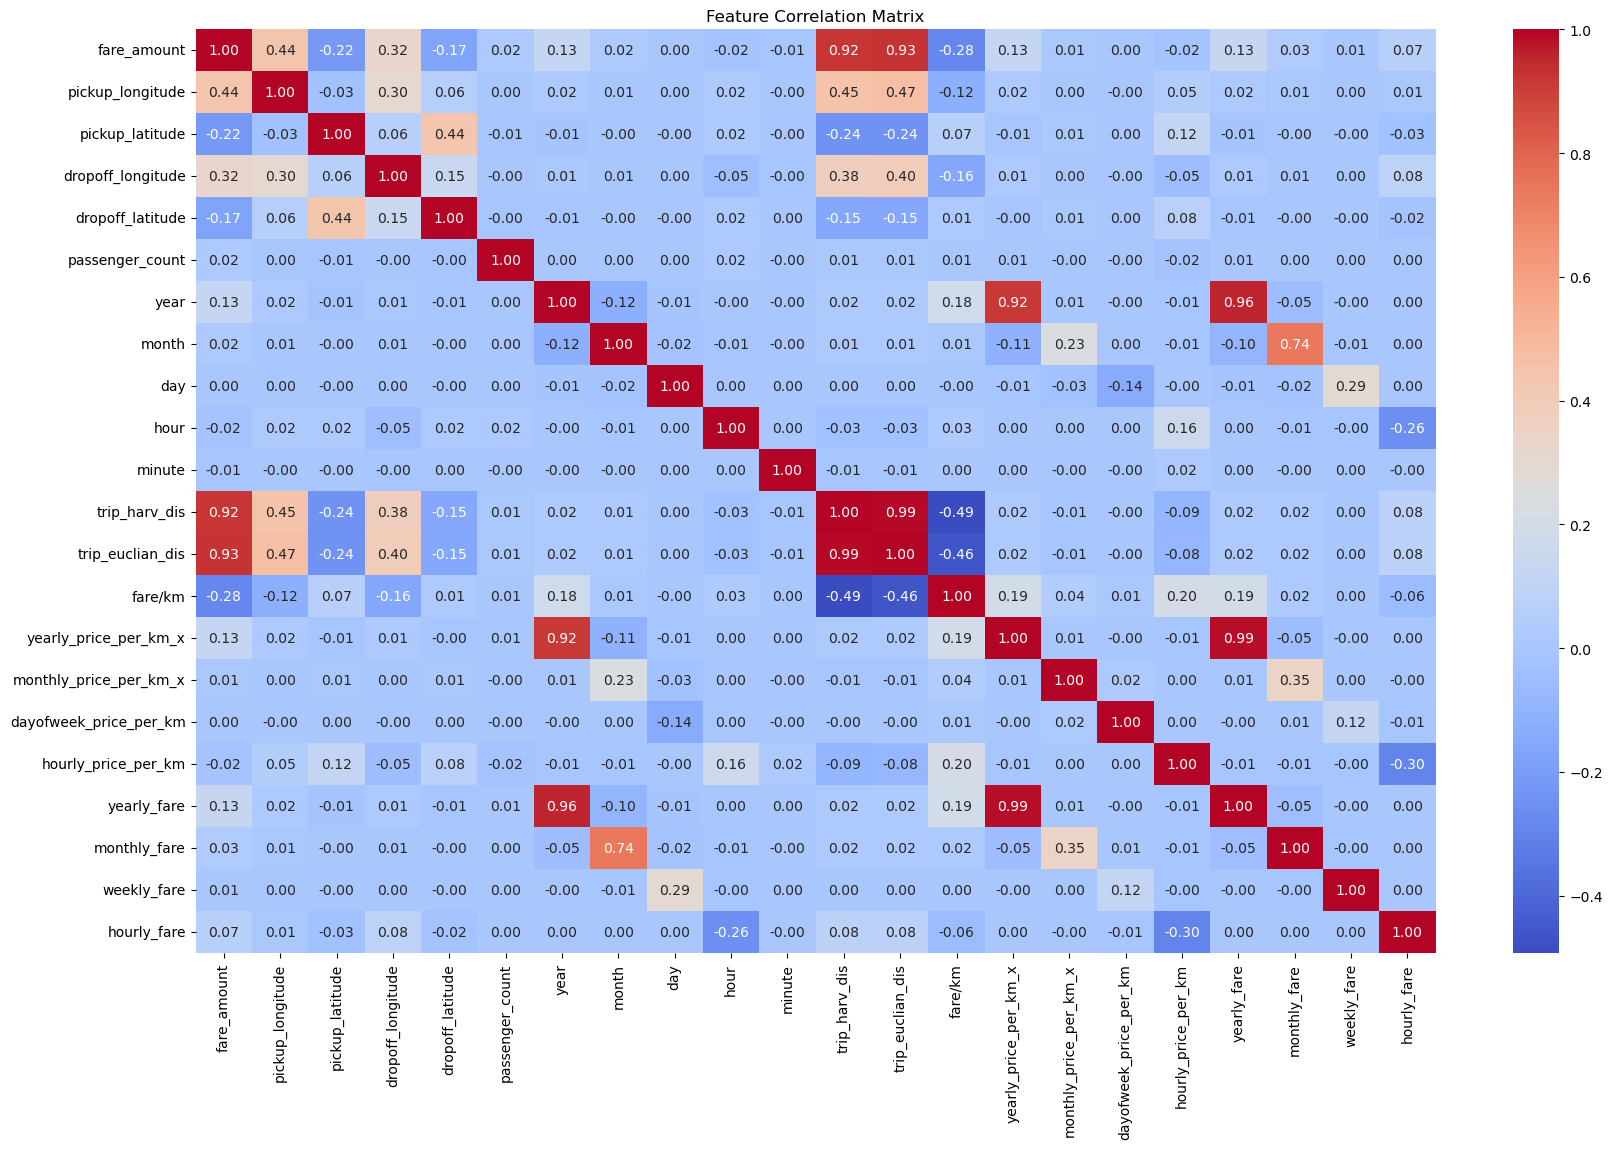

In [7]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

baseline model

In [8]:
X1=train_df.drop('fare_amount',axis=1)
y1=train_df['fare_amount']

In [9]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,random_state=42,test_size=.2,shuffle=True)


In [10]:
model1=LinearRegression()
model1.fit(X_train1,y_train1)

LinearRegression()

In [11]:
print(model1.score(X_train1,y_train1))
print(model1.score(X_test1,y_test1))
y_test1_pred=model1.predict(X_test1)
print(root_mean_squared_error(y_test1,y_test1_pred))

0.8956447160731442
0.895350683045996
3.020276187674031


In [12]:
train_df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'minute', 'trip_harv_dis', 'trip_euclian_dis',
       'fare/km', 'yearly_price_per_km_x', 'monthly_price_per_km_x',
       'dayofweek_price_per_km', 'hourly_price_per_km', 'yearly_fare',
       'monthly_fare', 'weekly_fare', 'hourly_fare'],
      dtype='object')

In [13]:
features=['trip_harv_dis','trip_euclian_dis','year','month','yearly_fare','hourly_fare','monthly_price_per_km_x','yearly_price_per_km_x']
X2=train_df[features]
y2=train_df['fare_amount']
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,random_state=42,test_size=.2,shuffle=True)

model2=LinearRegression()
model2.fit(X_train2,y_train2)

LinearRegression()

In [14]:
print(model2.score(X_train2,y_train2))
print(model2.score(X_test2,y_test2))
y_test2_pred=model2.predict(X_test2)
y_train2_pred=model2.predict(X_train2)
print(root_mean_squared_error(y_test2,y_test2_pred))
print(root_mean_squared_error(y_train2,y_train2_pred))

0.8695461325740522
0.8692244215305821
3.3763058750915644
3.3639262369272567


In [15]:
models={
    'linear_model':LinearRegression(),
    'tree' :DecisionTreeRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    'AdaBoost':AdaBoostRegressor(),
    'XGBRegressor':XGBRegressor()
    
}

In [16]:
import time
trained_models = {}
for model_name, model in models.items():
    start_time = time.time()
    try:
        model.fit(X_train2, y_train2)
        end_time = time.time()
        training_time = end_time - start_time
        trained_models[model_name] = (model, training_time)
        print(f"{model_name} trained successfully in {training_time:.2f} seconds.")
    except Exception as e:
        print(f"Error training {model_name}: {e}")

linear_model trained successfully in 0.71 seconds.
tree trained successfully in 40.00 seconds.
GradientBoosting trained successfully in 645.93 seconds.
AdaBoost trained successfully in 100.70 seconds.
XGBRegressor trained successfully in 12.74 seconds.


In [19]:
trained_models

{'linear_model': (LinearRegression(), 0.7124135494232178),
 'tree': (DecisionTreeRegressor(), 40.00334858894348),
 'GradientBoosting': (GradientBoostingRegressor(), 645.9281513690948),
 'AdaBoost': (AdaBoostRegressor(), 100.69715070724487),
 'XGBRegressor': (XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None

In [20]:
results = {}
for model_name, (model, training_time) in trained_models.items():
    try:
        y_train_pred = model.predict(X_train2)
        y_test_pred = model.predict(X_test2)

        rmse_train = root_mean_squared_error(y_train2, y_train_pred)
        rmse_test = root_mean_squared_error(y_test2, y_test_pred)
        mape_train = mean_absolute_percentage_error(y_train2, y_train_pred)
        mape_test = mean_absolute_percentage_error(y_test2, y_test_pred)
        results[model_name] = {
            'RMSE_train': rmse_train,
            'RMSE_TEST': rmse_test,
            'mape_train':mape_train,
            'mape_test':mape_test,
            'training_time': training_time
        }
        print(f"{model_name}: rmse (train) = {rmse_train:.4f}, rmse (test) = {rmse_test:.4f}")

    except Exception as e:
        print(f"Error evaluating {model_name}: {e}")
        results[model_name] = {
            'f1_train': None,
            'f1_test': None,
            'training_time': training_time
        }

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')
display(results_df.T)

linear_model: rmse (train) = 3.3639, rmse (test) = 3.3763
tree: rmse (train) = 0.0019, rmse (test) = 4.2404
GradientBoosting: rmse (train) = 3.0983, rmse (test) = 3.1127
AdaBoost: rmse (train) = 3.7157, rmse (test) = 3.7213
XGBRegressor: rmse (train) = 3.0047, rmse (test) = 3.0162


,linear_model,tree,GradientBoosting,AdaBoost,XGBRegressor
RMSE_train,3.363926,1.884345e-03,3.098312,3.715691,3.004720
RMSE_TEST,3.376306,4.240433e+00,3.112657,3.721272,3.016196
mape_train,0.186394,3.618153e-07,0.165805,0.227860,0.154806
mape_test,0.186536,2.195306e-01,0.165777,0.227956,0.155013
training_time,0.712414,4.000335e+01,645.928151,100.697151,12.741903


In [71]:
model=trained_models['XGBRegressor'][0]
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
results_df.T["XGBRegressor"].drop('training_time').to_dict()

{'RMSE_train': 3.004720104988878,
 'RMSE_TEST': 3.0161958328561775,
 'mape_train': 0.154806039714285,
 'mape_test': 0.155013069884246}

In [53]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from pathlib import Path

In [42]:
LOG_PATH = "../models/temp"
LOG_DATA_PKL    =  "data.pkl"
LOG_MODEL_PKL   =  "model.pkl"
LOG_METRICS_PKL =  "metrics.pkl"

In [43]:
Path(LOG_PATH).mkdir(parents=True, exist_ok=True) 

In [59]:
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlruns_path = os.path.join(project_root, "mlruns")
os.makedirs(mlruns_path, exist_ok=True)
print(project_root)
mlflow.set_tracking_uri("file:///d:/taki_fair_prediction/mlruns")
mlflow.set_experiment("taxi_fair_prediction")


2025/04/18 17:51:15 INFO mlflow.tracking.fluent: Experiment with name 'taxi_fair_prediction' does not exist. Creating a new experiment.


d:\taki_fair_prediction


<Experiment: artifact_location='file:///d:/taki_fair_prediction/mlruns/335858222004188502', creation_time=1744991475961, experiment_id='335858222004188502', last_update_time=1744991475961, lifecycle_stage='active', name='taxi_fair_prediction', tags={}>

In [60]:

with mlflow.start_run(run_name="xgboost_baseline_v1"):
        # Parameters
    mlflow.log_param("model_type", "XGBoost")

   

    # Log metrics
    mlflow.log_metrics(results_df.T["XGBRegressor"].to_dict())

    # Log model
    mlflow.xgboost.log_model(trained_models['XGBRegressor'][0],  artifact_path="model")



c:\Users\Mohamed Mosaad\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:52:00] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
2025/04/18 17:52:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [61]:
yearly_fare=pd.read_pickle(r'..\data\processed\temp\yearly_fare.pkl')
hourly_fare=pd.read_pickle(r'..\data\processed\temp\hourly_fare.pkl')
monthly_price_per_km=pd.read_pickle(r'..\data\processed\temp\monthly_price_per_km.pkl')
yearly_price_per_km=pd.read_pickle(r'..\data\processed\temp\yearly_price_per_km.pkl')

In [62]:
test_df=pd.read_csv(TEST_PATH)

In [63]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [64]:
test_df['key']=pd.to_datetime(test_df['key'])
test_df['year']=test_df['key'].dt.year
test_df['month']=test_df['key'].dt.month
test_df['day']=test_df['key'].dt.month

test_df['hour']=test_df['key'].dt.hour


In [65]:
test_df=test_df.merge(yearly_fare,on='year',how='left')
test_df=test_df.merge(hourly_fare,on='hour',how='left')
test_df=test_df.merge(monthly_price_per_km,on='month',how='left')
test_df=test_df.merge(yearly_price_per_km,on='year',how='left')


In [66]:
def harvesine_dis(lon1,lat1,lon2,lat2):
    R = 6371  # Earth radius in kilometers

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

def euclidean_distance(lon1, lat1, lon2, lat2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

def add_dis(df):
    df["trip_harv_dis"]=harvesine_dis(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)
    df["trip_euclian_dis"]=euclidean_distance(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)

add_dis(test_df)

In [67]:
test_df.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,yearly_fare,hourly_fare,monthly_price_per_km,yearly_price_per_km,trip_harv_dis,trip_euclian_dis
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,13.05,11.56,3.76,4.26,2.323260,0.021554
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,13.05,11.56,3.76,4.26,2.425353,0.023180
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,10,11,10.42,11.15,3.81,3.48,0.618628,0.005870
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,12,21,11.20,11.03,3.87,3.65,1.961033,0.018649
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,12,21,11.20,11.03,3.87,3.65,5.387301,0.050631


In [68]:
test_df.shape


(9914, 17)

In [69]:
test_df.rename(columns={"monthly_price_per_km": "monthly_price_per_km_x"}, inplace=True)
test_df.rename(columns={"yearly_price_per_km": "yearly_price_per_km_x"}, inplace=True)



In [70]:
X_test=test_df[features]
X_test


,trip_harv_dis,trip_euclian_dis,year,month,yearly_fare,hourly_fare,monthly_price_per_km_x,yearly_price_per_km_x
0,2.323260,0.021554,2015,1,13.05,11.56,3.76,4.26
1,2.425353,0.023180,2015,1,13.05,11.56,3.76,4.26
2,0.618628,0.005870,2011,10,10.42,11.15,3.81,3.48
3,1.961033,0.018649,2012,12,11.20,11.03,3.87,3.65
4,5.387301,0.050631,2012,12,11.20,11.03,3.87,3.65
...,...,...,...,...,...,...,...,...
9909,2.124874,0.020776,2015,5,13.05,11.15,3.75,4.26
9910,3.270969,0.030945,2015,1,13.05,11.48,3.76,4.26
9911,19.183941,0.216985,2015,4,13.05,10.75,3.76,4.26
9912,8.343486,0.080920,2015,1,13.05,11.36,3.76,4.26


In [72]:
predictions=model.predict(X_test)

In [76]:
predictions[:50]

array([ 9.50471  ,  9.944362 ,  4.2205305,  7.876051 , 16.130756 ,
       10.746293 ,  5.7004175, 51.385036 , 11.30628  ,  6.7037196,
        9.573031 , 18.294827 ,  4.2905464,  7.0500717,  7.835336 ,
       11.720591 ,  3.2701144,  9.410252 ,  4.6635695,  3.572062 ,
        7.493306 , 10.260463 ,  7.1213565,  8.716187 , 19.354948 ,
        7.0601716, 42.348778 , 27.773636 ,  6.633802 , 16.882164 ,
       12.088113 ,  6.4570203,  6.3835964, 12.149976 ,  9.344624 ,
        8.060261 ,  6.633802 ,  6.443156 ,  9.083696 ,  4.9464655,
       21.940502 , 11.151236 , 20.01245  , 10.41106  ,  4.606302 ,
       11.700923 ,  6.1260433,  7.707489 ,  6.8510222,  5.153532 ],
      dtype=float32)

In [112]:
test_df = pd.read_csv(TEST_PATH)

print("Total rows:", len(test_df))
print("Unique keys:", test_df["key"].nunique())
print("Duplicate keys in test set:", test_df.duplicated(subset="key").sum())

Total rows: 9914
Unique keys: 9914
Duplicate keys in test set: 0


In [115]:
submission = pd.DataFrame({
    "key": test_df["key"],
    "fare_amount": predictions
})

In [116]:
submission.to_csv('submission.csv', index=False)  

In [119]:
pd.read_pickle(r'D:\taki_fair_prediction\notebooks\dataframe.pkl')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,...,yearly_price_per_km_x,monthly_price_per_km_x,yearly_price_per_km_y,monthly_price_per_km_y,dayofweek_price_per_km,hourly_price_per_km,yearly_fare,monthly_fare,weekly_fare,hourly_fare
0,13.0,2015-04-28 14:53:14 UTC,-73.963570,40.771313,-73.978333,40.751076,1,2015,4,28,...,4.26,3.76,4.26,3.76,3.76,4.08,13.05,11.32,11.38,11.90
1,24.5,2013-03-16 22:10:15 UTC,-73.985932,40.778404,-73.996953,40.722665,2,2013,3,16,...,4.08,3.76,4.08,3.76,3.75,3.45,12.63,11.19,11.36,11.29
2,6.9,2010-07-30 23:12:10 UTC,-74.008468,40.720306,-73.991503,40.736797,1,2010,7,30,...,3.45,3.63,3.45,3.63,3.76,3.39,10.03,11.09,11.33,11.58
3,8.5,2012-11-27 20:57:00 UTC,-73.970175,40.753165,-73.993177,40.746402,6,2012,11,27,...,3.65,3.82,3.65,3.82,3.76,3.63,11.20,11.55,11.43,10.75
4,16.0,2012-11-09 16:40:44 UTC,-73.959817,40.782076,-73.977885,40.736664,1,2012,11,9,...,3.65,3.82,3.65,3.82,3.77,3.91,11.20,11.55,11.24,11.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759545,26.0,2014-02-13 09:14:18 UTC,-73.971071,40.793042,-73.993785,40.735692,1,2014,2,13,...,4.17,3.79,4.17,3.79,3.77,4.10,12.91,10.87,11.34,10.90
4759546,16.0,2015-02-17 12:51:14 UTC,-73.988289,40.758099,-73.948479,40.774315,1,2015,2,17,...,4.26,3.79,4.26,3.79,3.75,4.13,13.05,10.87,11.38,11.15
4759547,4.5,2011-05-07 00:54:00 UTC,-73.984467,40.742635,-73.992980,40.736825,5,2011,5,7,...,3.48,3.75,3.48,3.75,3.78,3.33,10.42,11.59,11.29,11.61
4759548,14.0,2012-09-10 16:18:00 UTC,-73.954360,40.765430,-73.991362,40.754072,6,2012,9,10,...,3.65,3.79,3.65,3.79,3.77,3.91,11.20,11.62,11.28,11.89
